In [1]:
import seaborn as sns
import pandas as pd
import pyspark.sql.functions as F
import matplotlib.pyplot as plt


In [2]:
data = 'gs://pstat135-voter-file/VM2Uniform'



In [3]:
# data_dict = spark.read.format("csv")\
#     .option("header", "true")\
#   .option("nullValue", "NA")\
#   .load(data+"VM2Uniform--MI--2021-01-30/VM2Uniform--MI--2021-01-30_DataDictionary.csv")

# data_dict.show(5)

In [4]:
# bucket_dir = "gs://pstat135-voter-file/VM2Uniform/"
# df = spark.read.parquet(bucket_dir + 'VM2Uniform--AK--2021-02-03')
# df.select(*["General_2020", "Voters_Age", "Voters_Gender","County", "Voters_Active"]).show(5)


In [11]:
# MI - Michigan -- Swing State
mi_df = spark.read.parquet(data + "/" + "VM2Uniform--MI--2021-01-30")


In [6]:
# SC - South Carolina -- Rep. State
sc_df = spark.read.parquet(data + "/" + "VM2Uniform--SC--2021-04-16")

In [7]:
# MD - Maryland -- Dem State
md_df = spark.read.parquet(data + "/" + "VM2Uniform--MD--2021-02-15")

In [12]:
mi_df.fillna(0, subset=["CommercialData_BookBuyerInHome"]).agg({"CommercialData_BookBuyerInHome": "mean"}).collect()


[Row(avg(CommercialData_BookBuyerInHome)=2.593218967009188)]

In [13]:
sc_df.fillna(0, subset=["CommercialData_BookBuyerInHome"]).agg({"CommercialData_BookBuyerInHome": "mean"}).collect()

[Row(avg(CommercialData_BookBuyerInHome)=2.4753504177432237)]

In [14]:
md_df.fillna(0, subset=["CommercialData_BookBuyerInHome"]).agg({"CommercialData_BookBuyerInHome": "mean"}).collect()

[Row(avg(CommercialData_BookBuyerInHome)=2.4846737757047594)]

## Examining Interest in guns in each state

In [15]:
# Swing State
mi_total = mi_df.select("CommercialDataLL_Gun_Owner").count()
mi_int_in_shooting = mi_df.where(mi_df["CommercialDataLL_Gun_Owner"] == "Yes").count()
mi_int_in_shooting / mi_total

0.11209970013107003

In [16]:
# Red State
sc_total = sc_df.select("CommercialDataLL_Gun_Owner").count()
sc_int_in_shooting = sc_df.where(sc_df["CommercialDataLL_Gun_Owner"] == "Yes").count()
sc_int_in_shooting / sc_total

0.09195829400568246

In [17]:
# Blue State
md_total = md_df.select("CommercialDataLL_Gun_Owner").count()
md_int_in_shooting = md_df.where(md_df["CommercialDataLL_Gun_Owner"] == "Yes").count()
md_int_in_shooting / md_total

0.08032389668586108

In [18]:
md_df.select("PresidentialPrimary_2020").show(20)

+------------------------+
|PresidentialPrimary_2020|
+------------------------+
|                       Y|
|                       Y|
|                    null|
|                       Y|
|                       Y|
|                       Y|
|                    null|
|                       Y|
|                    null|
|                    null|
|                    null|
|                    null|
|                    null|
|                       Y|
|                       Y|
|                    null|
|                    null|
|                    null|
|                    null|
|                    null|
+------------------------+
only showing top 20 rows



In [19]:
cols_to_select = ["Voters_FirstName", "Voters_LastName", "Voters_Age",
                  "PresidentialPrimary_2020",
                  "General_2020"
                 ]

md_df.select(*cols_to_select).show(10)

+----------------+---------------+----------+------------------------+------------+
|Voters_FirstName|Voters_LastName|Voters_Age|PresidentialPrimary_2020|General_2020|
+----------------+---------------+----------+------------------------+------------+
|        Kristina|       Haddaway|        48|                       Y|           Y|
|         Bridget|         Harper|        42|                       Y|           Y|
|             Jon|         Harper|        51|                    null|           Y|
|           Caryn|         Barnes|        52|                       Y|           Y|
|          Braden|         Barnes|      null|                       Y|           Y|
|           Casey|         Barnes|      null|                       Y|           Y|
|          Shelby|         Barnes|        23|                    null|           Y|
|        Lawrence|         Barnes|        52|                       Y|           Y|
|            Eric|       Beaufait|        50|                    null|      

In [20]:
sc_df.select(*["County", "Voters_FIPS",
               "ElectionReturns_P16_Cnty_Vote_Trump_R",
               "ElectionReturns_P16CountyTurnoutRepublicans"])\
    .show(10)

+--------+-----------+-------------------------------------+-------------------------------------------+
|  County|Voters_FIPS|ElectionReturns_P16_Cnty_Vote_Trump_R|ElectionReturns_P16CountyTurnoutRepublicans|
+--------+-----------+-------------------------------------+-------------------------------------------+
|MARLBORO|        069|                                  741|                                        22%|
|MARLBORO|        069|                                  741|                                        22%|
|MARLBORO|        069|                                  741|                                        22%|
|MARLBORO|        069|                                  741|                                        22%|
|MARLBORO|        069|                                  741|                                        22%|
|MARLBORO|        069|                                  741|                                        22%|
|MARLBORO|        069|                                 

In [21]:
land_cols = ["General_2020", "Voters_Age", "Voters_Gender","County", "Voters_Active",
                    "Voters_VotingPerformanceEvenYearGeneral", "ElectionReturns_G18CountyTurnoutRepublicans",
                   "ElectionReturns_G18CountyTurnoutIndependentsAllOthers", 
                   "ElectionReturns_G18CountyTurnoutDemocrats",
                   "ElectionReturns_P18CountyTurnoutAllRegisteredVoters",
                   "ElectionReturns_G16CountyTurnoutRepublicans",
                   "ElectionReturns_G16CountyTurnoutIndependentsAllOthers", 
                   "ElectionReturns_G16CountyTurnoutDemocrats",
                   "ElectionReturns_P16CountyTurnoutAllRegisteredVoters",
                   "ElectionReturns_G14CountyTurnoutRepublicans",
                   "ElectionReturns_G14CountyTurnoutIndependentsAllOthers", 
                   "ElectionReturns_G14CountyTurnoutDemocrats",
                   "ElectionReturns_P14CountyTurnoutAllRegisteredVoters",
                   "ElectionReturns_G12CountyTurnoutRepublicans",
                   "ElectionReturns_G12CountyTurnoutIndependentsAllOthers", 
                   "ElectionReturns_G12CountyTurnoutDemocrats",
                   "ElectionReturns_P12CountyTurnoutAllRegisteredVoters",
                   "Residence_Addresses_Property_LandSq_Footage",
                   "Residence_Addresses_Property_HomeSq_Footage",
                    "CommercialDataLL_Gun_Owner",
                    "CommercialDataLL_Interest_in_Religious_Inspirational_In_Household",
                    "Parties_Description"
                    
                   ]

In [22]:
sc_df_pd = sc_df.select(*land_cols).sample(True, 0.005, 123).toPandas()
md_df_pd = md_df.select(*land_cols).sample(True, 0.005, 123).toPandas()
mi_df_pd = mi_df.select(*land_cols).sample(True, 0.005, 123).toPandas()

23/03/15 23:24:07 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [23]:
sc_df_pd = sc_df_pd.sample(2000, random_state=123)
md_df_pd = md_df_pd.sample(2000, random_state=123)
mi_df_pd = mi_df_pd.sample(2000, random_state=123)


In [24]:
sc_df_pd["State"] = "SC"
md_df_pd["State"] = "MD"
mi_df_pd["State"] = "MI"

In [40]:
all_pd = sc_df_pd.append(md_df_pd).append(mi_df_pd)
all_pd["CommercialDataLL_Interest_in_Religious_Inspirational_In_Household"] = all_pd["CommercialDataLL_Interest_in_Religious_Inspirational_In_Household"] == "Yes"
all_pd["CommercialDataLL_Gun_Owner"] = all_pd["CommercialDataLL_Gun_Owner"] == "Yes"

all_pd['ElectionReturns_G18CountyTurnoutRepublicans'] = pd.to_numeric(all_pd['ElectionReturns_G18CountyTurnoutRepublicans'].str.replace(r'%', ''))
all_pd['ElectionReturns_G18CountyTurnoutDemocrats'] = pd.to_numeric(all_pd['ElectionReturns_G18CountyTurnoutDemocrats'].str.replace(r'%', ''))
all_pd['ElectionReturns_G16CountyTurnoutRepublicans'] = pd.to_numeric(all_pd['ElectionReturns_G16CountyTurnoutRepublicans'].str.replace(r'%', ''))
all_pd['ElectionReturns_G16CountyTurnoutDemocrats'] = pd.to_numeric(all_pd['ElectionReturns_G16CountyTurnoutDemocrats'].str.replace(r'%', ''))

all_pd["Voters_Age"] = pd.to_numeric(all_pd["Voters_Age"])
all_pd["Residence_Addresses_Property_LandSq_Footage"] = pd.to_numeric(all_pd["Residence_Addresses_Property_LandSq_Footage"])
all_pd["Residence_Addresses_Property_HomeSq_Footage"] = pd.to_numeric(all_pd["Residence_Addresses_Property_HomeSq_Footage"])

all_pd.shape

(6000, 28)

In [26]:
all_pd.head()

,General_2020,Voters_Age,Voters_Gender,County,Voters_Active,Voters_VotingPerformanceEvenYearGeneral,ElectionReturns_G18CountyTurnoutRepublicans,ElectionReturns_G18CountyTurnoutIndependentsAllOthers,ElectionReturns_G18CountyTurnoutDemocrats,ElectionReturns_P18CountyTurnoutAllRegisteredVoters,...,ElectionReturns_G12CountyTurnoutRepublicans,ElectionReturns_G12CountyTurnoutIndependentsAllOthers,ElectionReturns_G12CountyTurnoutDemocrats,ElectionReturns_P12CountyTurnoutAllRegisteredVoters,Residence_Addresses_Property_LandSq_Footage,Residence_Addresses_Property_HomeSq_Footage,CommercialDataLL_Gun_Owner,CommercialDataLL_Interest_in_Religious_Inspirational_In_Household,Parties_Description,State
4341,None,68.0,F,HORRY,A,50%,65,27%,43,20%,...,85%,28%,57%,18%,0009000,02400,False,False,Republican,SC
9893,Y,39.0,M,YORK,A,40%,69,33%,50,16%,...,86%,34%,61%,3%,0493000,01400,False,False,Republican,SC
6609,Y,86.0,F,BEAUFORT,A,Not Eligible,73,34%,54,26%,...,82%,28%,65%,7%,0008000,02600,False,False,Non-Partisan,SC
9076,Y,81.0,M,SPARTANBURG,A,100%,66,23%,42,23%,...,87%,28%,59%,6%,0028000,01600,True,True,Republican,SC
4585,Y,28.0,F,HORRY,A,75%,65,27%,43,20%,...,85%,28%,57%,18%,0008000,01300,False,False,Democratic,SC


In [27]:
all_pd.dtypes

General_2020                                                          object
Voters_Age                                                           float64
Voters_Gender                                                         object
County                                                                object
Voters_Active                                                         object
Voters_VotingPerformanceEvenYearGeneral                               object
ElectionReturns_G18CountyTurnoutRepublicans                            int64
ElectionReturns_G18CountyTurnoutIndependentsAllOthers                 object
ElectionReturns_G18CountyTurnoutDemocrats                              int64
ElectionReturns_P18CountyTurnoutAllRegisteredVoters                   object
ElectionReturns_G16CountyTurnoutRepublicans                            int64
ElectionReturns_G16CountyTurnoutIndependentsAllOthers                 object
ElectionReturns_G16CountyTurnoutDemocrats                              int64

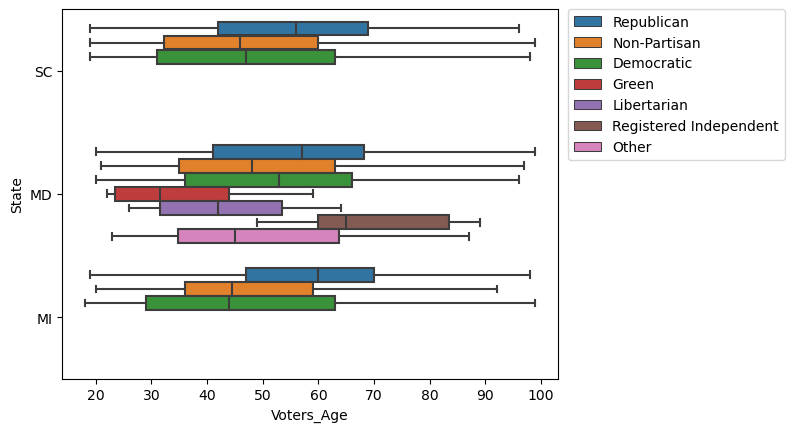

In [28]:
ageplot = sns.boxplot(data=all_pd, x="Voters_Age", y="State", hue="Parties_Description")
ageplot = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ageplot

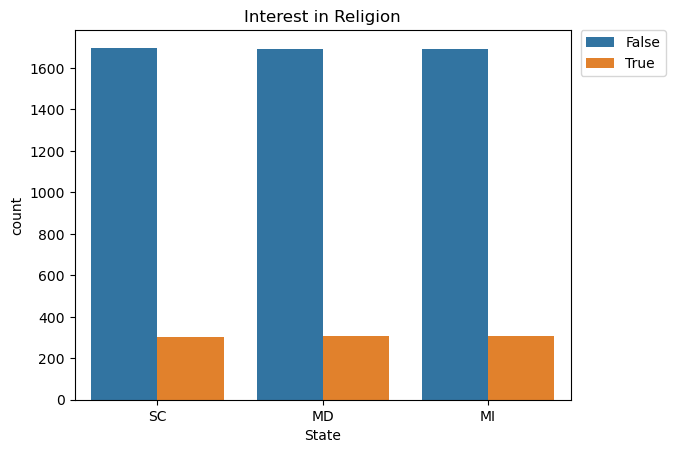

In [30]:

religion_chart = sns.countplot(data=all_pd, x="State",
                             hue="CommercialDataLL_Interest_in_Religious_Inspirational_In_Household").set(title="Interest in Religion")
religion_chart = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

religion_chart

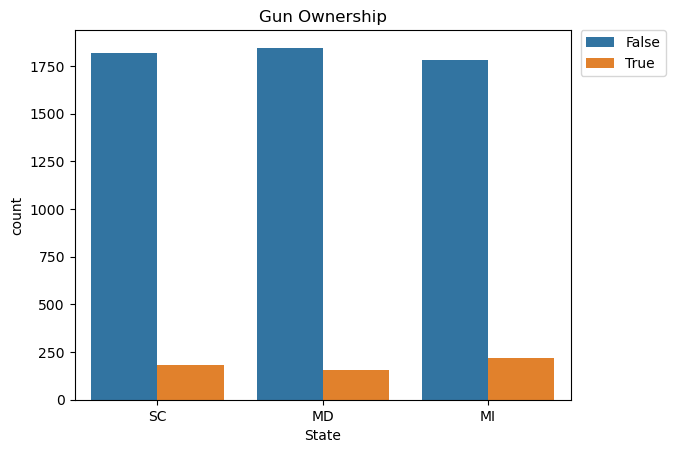

In [31]:
guns_chart = sns.countplot(data=all_pd, x="State",
                             hue="CommercialDataLL_Gun_Owner").set(title="Gun Ownership")
guns_chart = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

guns_chart

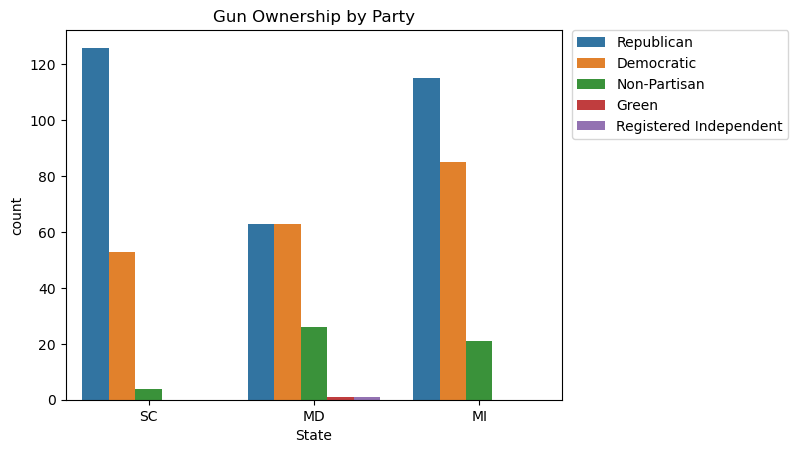

In [32]:
guns_df = all_pd[all_pd["CommercialDataLL_Gun_Owner"]]
guns_party_chart = sns.countplot(data=guns_df, x="State",
                             hue="Parties_Description").set(title="Gun Ownership by Party")
guns_party_chart = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

guns_party_chart

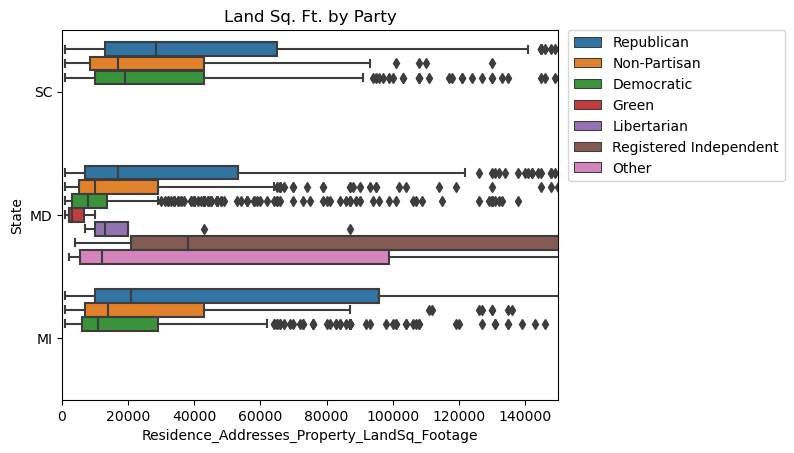

In [39]:
land_plot = sns.boxplot(data=all_pd, x="Residence_Addresses_Property_LandSq_Footage", y="State", hue="Parties_Description")
land_plot.set(title="Land Sq. Ft. by Party")
land_plot.set_xlim(0, 150000)
land_plot = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

land_plot

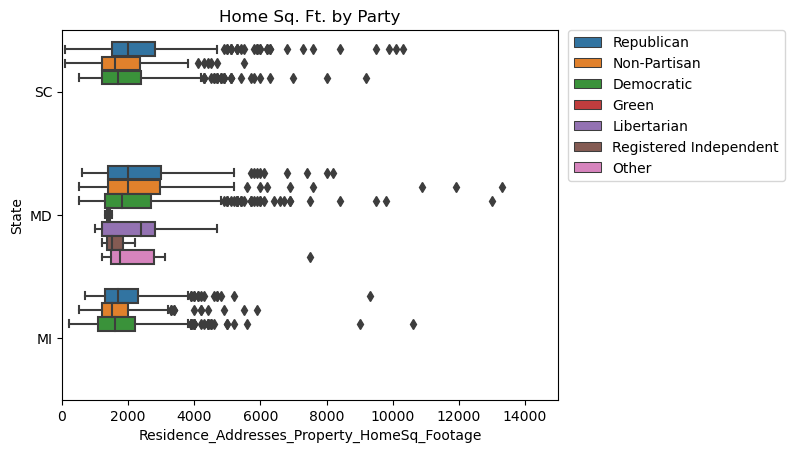

In [41]:
sqft_plot = sns.boxplot(data=all_pd, x="Residence_Addresses_Property_HomeSq_Footage", y="State", hue="Parties_Description")
sqft_plot.set(title="Home Sq. Ft. by Party")
sqft_plot.set_xlim(0, 15000)
sqft_plot = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

sqft_plot

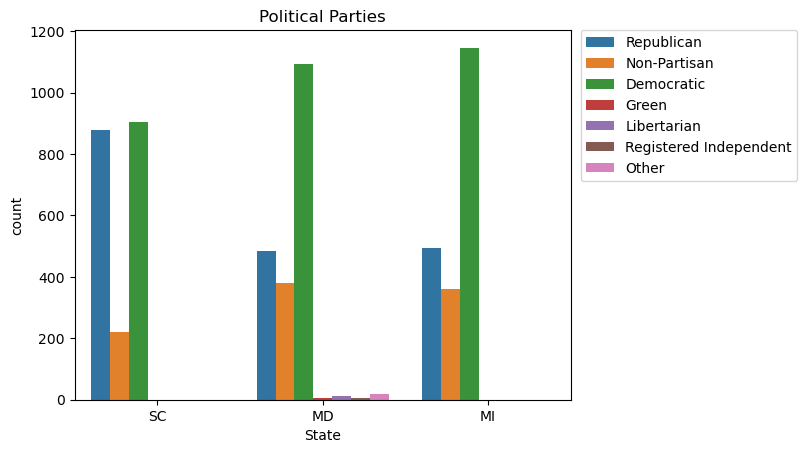

In [35]:
party_chart = sns.countplot(data=all_pd, x="State",
                             hue="Parties_Description").set(title="Political Parties")
party_chart = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

party_chart

No handles with labels found to put in legend.


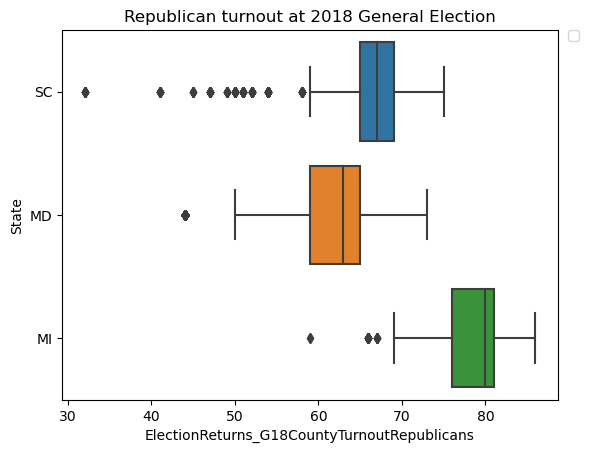

In [36]:

rep_turnout_plot = sns.boxplot(data=all_pd, x="ElectionReturns_G18CountyTurnoutRepublicans", y="State")
rep_turnout_plot.set(title="Republican turnout at 2018 General Election")
rep_turnout_plot = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

rep_turnout_plot

No handles with labels found to put in legend.


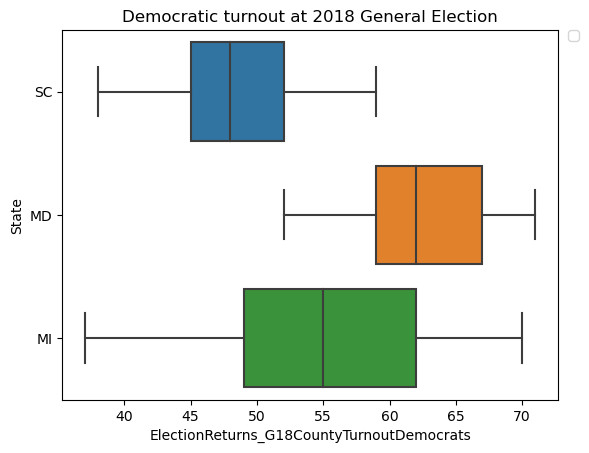

In [42]:
dem_turnout_plot = sns.boxplot(data=all_pd, x="ElectionReturns_G18CountyTurnoutDemocrats", y="State")
dem_turnout_plot.set(title="Democratic turnout at 2018 General Election")
dem_turnout_plot = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

dem_turnout_plot

In [43]:
turnout_2018 = all_pd[["ElectionReturns_G18CountyTurnoutDemocrats", "ElectionReturns_G18CountyTurnoutRepublicans", "State"]]
turnout_2018 = pd.melt(turnout_2018, id_vars="State", value_vars=["ElectionReturns_G18CountyTurnoutDemocrats", "ElectionReturns_G18CountyTurnoutRepublicans"])
turnout_2018.head()

,State,variable,value
0,SC,ElectionReturns_G18CountyTurnoutDemocrats,43
1,SC,ElectionReturns_G18CountyTurnoutDemocrats,50
2,SC,ElectionReturns_G18CountyTurnoutDemocrats,54
3,SC,ElectionReturns_G18CountyTurnoutDemocrats,42
4,SC,ElectionReturns_G18CountyTurnoutDemocrats,43


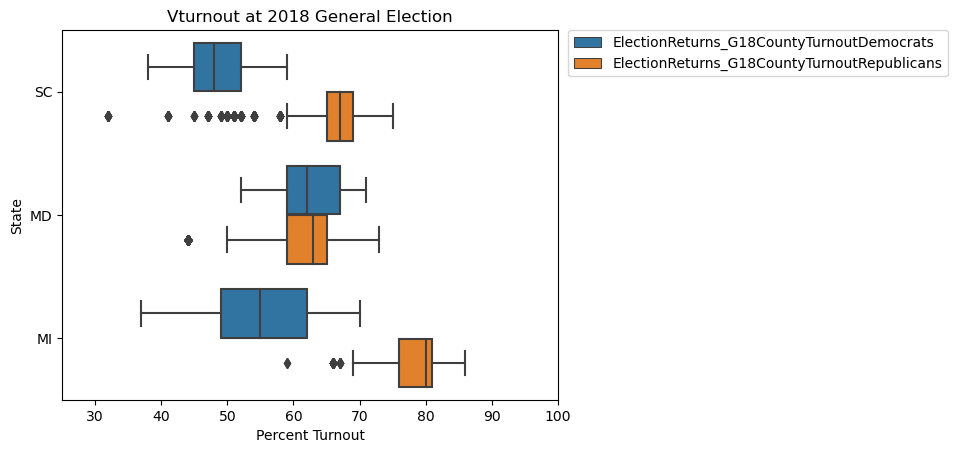

In [44]:
turnout_2018_plot = sns.boxplot(data=turnout_2018, x="value", y="State", hue="variable")
turnout_2018_plot.set(title="Vturnout at 2018 General Election", xlabel="Percent Turnout")
turnout_2018_plot.set_xlim(25,100)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [45]:
turnout_2016 = all_pd[["ElectionReturns_G16CountyTurnoutDemocrats", "ElectionReturns_G16CountyTurnoutRepublicans", "State"]]
turnout_2016 = pd.melt(turnout_2016, id_vars="State", value_vars=["ElectionReturns_G16CountyTurnoutDemocrats", "ElectionReturns_G16CountyTurnoutRepublicans"])
turnout_2016.head()



,State,variable,value
0,SC,ElectionReturns_G16CountyTurnoutDemocrats,56
1,SC,ElectionReturns_G16CountyTurnoutDemocrats,61
2,SC,ElectionReturns_G16CountyTurnoutDemocrats,63
3,SC,ElectionReturns_G16CountyTurnoutDemocrats,57
4,SC,ElectionReturns_G16CountyTurnoutDemocrats,56


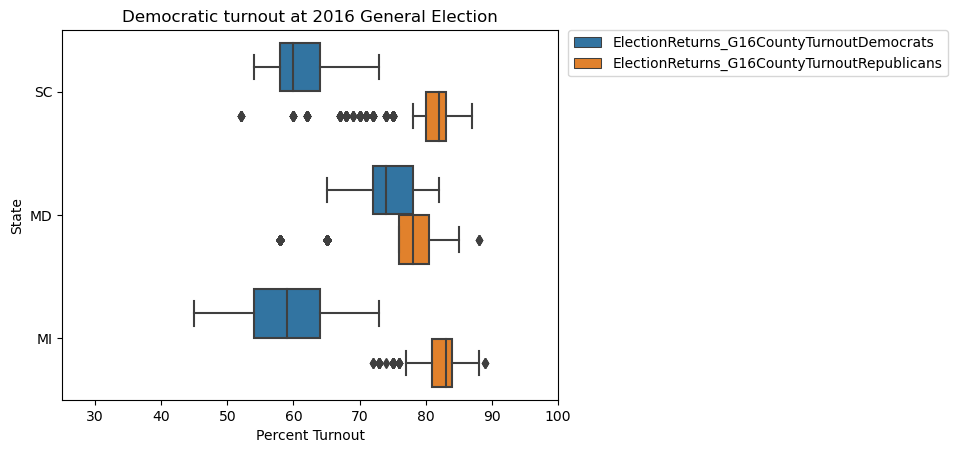

In [46]:
turnout_2016_plot = sns.boxplot(data=turnout_2016, x="value", y="State", hue="variable")
turnout_2016_plot.set(title="Democratic turnout at 2016 General Election", xlabel="Percent Turnout")
turnout_2016_plot.set_xlim(25,100)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [60]:
mi_party_tot = mi_df.groupBy("Parties_Description").count().sort("Parties_Description")

In [88]:
mi_party_tot.show()

+-------------------+-------+
|Parties_Description|  count|
+-------------------+-------+
|         Democratic|4164138|
|       Non-Partisan|1388458|
|         Republican|2041055|
+-------------------+-------+



In [107]:
mi_vote_party = mi_df.groupBy("Parties_Description", "General_2020").count().sort("Parties_Description")

In [108]:
mi_dem_tot = mi_party_tot.filter(mi_party_tot.Parties_Description == "Democratic").head()[1]
mi_np_tot = mi_party_tot.filter(mi_party_tot.Parties_Description == "Non-Partisan").head()[1]
mi_rep_tot = mi_party_tot.filter(mi_party_tot.Parties_Description == "Republican").head()[1]

In [113]:
mi_vote_party = mi_vote_party.withColumn("Total_Voted_General_2020", mi_vote_party["count"])
mi_vote_party = mi_vote_party.withColumn("Party_Total", F.when(mi_vote_party.Parties_Description == "Democratic",
                                                            mi_dem_tot)
                                                        .when(mi_vote_party.Parties_Description == "Non-Partisan",
                                                            mi_np_tot)
                                                        .when(mi_vote_party.Parties_Description == "Republican",
                                                            mi_rep_tot))

mi_vote_party = mi_vote_party.withColumn("Percent_Voted", F.round(mi_vote_party.Total_Voted_General_2020 / mi_vote_party.Party_Total, 3))
mi_vote_party = mi_vote_party.withColumn("State", F.lit("MI"))
mi_vote_party = mi_vote_party.drop("count")

mi_vote_party = mi_vote_party.filter(mi_vote_party.General_2020 == "Y").drop("General_2020")

In [114]:
mi_vote_party.show()

+-------------------+------------------------+-----------+-------------+-----+
|Parties_Description|Total_Voted_General_2020|Party_Total|Percent_Voted|State|
+-------------------+------------------------+-----------+-------------+-----+
|         Democratic|                 2894091|    4164138|        0.695|   MI|
|       Non-Partisan|                  763418|    1388458|         0.55|   MI|
|         Republican|                 1738843|    2041055|        0.852|   MI|
+-------------------+------------------------+-----------+-------------+-----+



In [115]:
mi_df.groupBy("General_2020").agg(F.round(F.mean("Residence_Addresses_Property_LandSq_Footage"),1).alias("Mean Land SqFt")).show()




+------------+------------+
|General_2020|Mean Land Sq|
+------------+------------+
|        null|    118865.3|
|           Y|    143424.6|
+------------+------------+



In [116]:
mi_df.groupBy("General_2020").agg(F.round(F.mean("Residence_Addresses_Property_HomeSq_Footage"),1).alias("Mean Home SqFt")).show()


+------------+--------------+
|General_2020|Mean Home SqFt|
+------------+--------------+
|        null|        1719.0|
|           Y|        1885.9|
+------------+--------------+



In [125]:
guns_totals = mi_df.groupBy("CommercialDataLL_Gun_Owner").count().sort("CommercialDataLL_Gun_Owner")
guns_totals.show()

gun_owners = guns_totals.filter(guns_totals.CommercialDataLL_Gun_Owner == "Yes").head()[1]
nongun_owners = guns_totals.head()[1]


+--------------------------+-------+
|CommercialDataLL_Gun_Owner|  count|
+--------------------------+-------+
|                      null|6742405|
|                       Yes| 851246|
+--------------------------+-------+



In [127]:
gun_owners

851246

In [134]:
mi_gun_table = mi_df.groupBy("CommercialDataLL_Gun_Owner", "General_2020").count().sort("CommercialDataLL_Gun_Owner")


mi_gun_table = mi_gun_table.withColumn("Total_Voted_General_2020", mi_gun_table["count"])
mi_gun_table = mi_gun_table.drop("count")

mi_gun_table = mi_gun_table.withColumn("Total", F.when(mi_gun_table["CommercialDataLL_Gun_Owner"] == "Yes", gun_owners)
                                                  .otherwise(nongun_owners))

mi_gun_table = mi_gun_table.withColumn("PercentVoted", F.round(mi_gun_table.Total_Voted_General_2020 / mi_gun_table.Total, 2))

mi_gun_table = mi_gun_table.filter(mi_gun_table.General_2020 == "Y")
mi_gun_table = mi_gun_table.drop("General_2020")

mi_gun_table.show()

+--------------------------+------------------------+-------+------------+
|CommercialDataLL_Gun_Owner|Total_Voted_General_2020|  Total|PercentVoted|
+--------------------------+------------------------+-------+------------+
|                      null|                 4653909|6742405|        0.69|
|                       Yes|                  742443| 851246|        0.87|
+--------------------------+------------------------+-------+------------+



In [49]:
mi_df.printSchema()

root
 |-- SEQUENCE: string (nullable = true)
 |-- LALVOTERID: string (nullable = true)
 |-- Voters_Active: string (nullable = true)
 |-- Voters_StateVoterID: string (nullable = true)
 |-- Voters_CountyVoterID: string (nullable = true)
 |-- VoterTelephones_LandlineAreaCode: string (nullable = true)
 |-- VoterTelephones_Landline7Digit: string (nullable = true)
 |-- VoterTelephones_LandlineFormatted: string (nullable = true)
 |-- VoterTelephones_LandlineUnformatted: string (nullable = true)
 |-- VoterTelephones_LandlineConfidenceCode: string (nullable = true)
 |-- VoterTelephones_CellPhoneOnly: string (nullable = true)
 |-- VoterTelephones_CellPhoneFormatted: string (nullable = true)
 |-- VoterTelephones_CellPhoneUnformatted: string (nullable = true)
 |-- VoterTelephones_CellConfidenceCode: string (nullable = true)
 |-- Voters_FirstName: string (nullable = true)
 |-- Voters_MiddleName: string (nullable = true)
 |-- Voters_LastName: string (nullable = true)
 |-- Voters_NameSuffix: string (